In [1]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

In [2]:
data_file1 = "Resources/Table 43a.xlsx"

In [3]:
data_file1_df = pd.read_excel(open(data_file1, 'rb'), sheet_name= "Sheet1")
data_file1_df

,Year,State/Territory,Affiliation (Gov/Non-gov),Affiliation (Gov/Cath/Ind),FT/PT,Sex,School Level,National Report on Schooling (ANR) School Level,Year (Grade),FTE Aboriginal and Torres Strait Islander Students,FTE Non-Indigenous Students,FTE All Students
0,2020,a NSW,a Government,a Government,a Full-time,a Male,a Primary School,a Primary School,a Pre-Year 1 (Foundation Year),3102.0,33669.0,36771.0
1,2020,a NSW,a Government,a Government,a Full-time,a Male,a Primary School,a Primary School,b Year 1,3153.0,33636.0,36789.0
2,2020,a NSW,a Government,a Government,a Full-time,a Male,a Primary School,a Primary School,c Year 2,3106.0,34483.0,37589.0
3,2020,a NSW,a Government,a Government,a Full-time,a Male,a Primary School,a Primary School,d Year 3,2969.0,33682.0,36651.0
4,2020,a NSW,a Government,a Government,a Full-time,a Male,a Primary School,a Primary School,e Year 4,2834.0,33465.0,36299.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14138,2006,h ACT,b Non-government,c Independent,a Full-time,b Female,b Secondary School,c Senior Secondary School,o Year 12,0.0,253.0,253.0
14139,2006,h ACT,b Non-government,c Independent,b Part-time,a Male,a Primary School,a Primary School,a Pre-Year 1 (Foundation Year),0.0,30.5,30.5
14140,2006,h ACT,b Non-government,c Independent,b Part-time,a Male,b Secondary School,b Junior Secondary School,p Ungraded secondary,0.0,3.2,3.2
14141,2006,h ACT,b Non-government,c Independent,b Part-time,b Female,a Primary School,a Primary School,a Pre-Year 1 (Foundation Year),0.0,34.2,34.2


In [4]:
data_file1_df.dtypes

Year                                                     int64
State/Territory                                         object
Affiliation (Gov/Non-gov)                               object
Affiliation (Gov/Cath/Ind)                              object
FT/PT                                                   object
Sex                                                     object
School Level                                            object
National Report on Schooling (ANR) School Level         object
Year (Grade)                                            object
FTE Aboriginal and Torres Strait Islander Students     float64
FTE Non-Indigenous Students                            float64
FTE All Students                                       float64
dtype: object

In [5]:
# data_file1_df [['Year', 'State/Territory', 'Affiliation (Gov/Non-gov)',
       #'Affiliation (Gov/Cath/Ind)', 'FT/PT', 'Sex', 'School Level',
      # 'National Report on Schooling (ANR) School Level', 'Year (Grade)',
       #'FTE Aboriginal and Torres Strait Islander Students ',
       #'FTE Non-Indigenous Students ', 'FTE All Students ']]

In [6]:
 def func(x):
    if type(x) == float:
        x = ' '
    return x.split(' ')[-1]

In [7]:
 my_list = ["State/Territory","Affiliation (Gov/Non-gov)", "Affiliation (Gov/Cath/Ind)", "FT/PT", "Sex", "School Level","National Report on Schooling (ANR) School Level","Year (Grade)"]

In [8]:
for items in my_list:
    data_file1_df[items] = data_file1_df[items].apply(lambda x: func(x))
data_file1_df

,Year,State/Territory,Affiliation (Gov/Non-gov),Affiliation (Gov/Cath/Ind),FT/PT,Sex,School Level,National Report on Schooling (ANR) School Level,Year (Grade),FTE Aboriginal and Torres Strait Islander Students,FTE Non-Indigenous Students,FTE All Students
0,2020,NSW,Government,Government,Full-time,Male,School,School,Year),3102.0,33669.0,36771.0
1,2020,NSW,Government,Government,Full-time,Male,School,School,1,3153.0,33636.0,36789.0
2,2020,NSW,Government,Government,Full-time,Male,School,School,2,3106.0,34483.0,37589.0
3,2020,NSW,Government,Government,Full-time,Male,School,School,3,2969.0,33682.0,36651.0
4,2020,NSW,Government,Government,Full-time,Male,School,School,4,2834.0,33465.0,36299.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14138,2006,ACT,Non-government,Independent,Full-time,Female,School,School,12,0.0,253.0,253.0
14139,2006,ACT,Non-government,Independent,Part-time,Male,School,School,Year),0.0,30.5,30.5
14140,2006,ACT,Non-government,Independent,Part-time,Male,School,School,secondary,0.0,3.2,3.2
14141,2006,ACT,Non-government,Independent,Part-time,Female,School,School,Year),0.0,34.2,34.2


In [9]:
data_file1_df

,Year,State/Territory,Affiliation (Gov/Non-gov),Affiliation (Gov/Cath/Ind),FT/PT,Sex,School Level,National Report on Schooling (ANR) School Level,Year (Grade),FTE Aboriginal and Torres Strait Islander Students,FTE Non-Indigenous Students,FTE All Students
0,2020,NSW,Government,Government,Full-time,Male,School,School,Year),3102.0,33669.0,36771.0
1,2020,NSW,Government,Government,Full-time,Male,School,School,1,3153.0,33636.0,36789.0
2,2020,NSW,Government,Government,Full-time,Male,School,School,2,3106.0,34483.0,37589.0
3,2020,NSW,Government,Government,Full-time,Male,School,School,3,2969.0,33682.0,36651.0
4,2020,NSW,Government,Government,Full-time,Male,School,School,4,2834.0,33465.0,36299.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14138,2006,ACT,Non-government,Independent,Full-time,Female,School,School,12,0.0,253.0,253.0
14139,2006,ACT,Non-government,Independent,Part-time,Male,School,School,Year),0.0,30.5,30.5
14140,2006,ACT,Non-government,Independent,Part-time,Male,School,School,secondary,0.0,3.2,3.2
14141,2006,ACT,Non-government,Independent,Part-time,Female,School,School,Year),0.0,34.2,34.2


In [10]:
def func(x):
    if type(x) == float:
        x = ' '
    return x.split(' ')[-1]

In [11]:
data_file1_df['State/Territory'] = data_file1_df['State/Territory'].apply(lambda x: func(x))

In [12]:
data_file1_df['State/Territory']

0        NSW
1        NSW
2        NSW
3        NSW
4        NSW
        ... 
14138    ACT
14139    ACT
14140    ACT
14141    ACT
14142    ACT
Name: State/Territory, Length: 14143, dtype: object

In [13]:
data_file1_df.describe()

,Year,FTE Aboriginal and Torres Strait Islander Students,FTE Non-Indigenous Students,FTE All Students
count,14143.000000,14143.000000,14143.00000,14143.000000
mean,2012.959202,197.264852,3680.44878,3877.713632
std,4.296281,447.751865,6268.03617,6637.495635
min,2006.000000,0.000000,0.00000,0.100000
25%,2009.000000,1.400000,25.00000,28.800000
50%,2013.000000,28.000000,708.00000,955.000000
75%,2017.000000,148.000000,5000.00000,5140.500000
max,2020.000000,3153.000000,34490.00000,37589.000000


In [14]:
data_file1_df.columns

Index(['Year', 'State/Territory', 'Affiliation (Gov/Non-gov)',
       'Affiliation (Gov/Cath/Ind)', 'FT/PT', 'Sex', 'School Level',
       'National Report on Schooling (ANR) School Level', 'Year (Grade)',
       'FTE Aboriginal and Torres Strait Islander Students ',
       'FTE Non-Indigenous Students ', 'FTE All Students '],
      dtype='object')

In [15]:
data_file1_df["State/Territory"].head()

0    NSW
1    NSW
2    NSW
3    NSW
4    NSW
Name: State/Territory, dtype: object

In [16]:
data_file1_df["State/Territory"].unique()

array(['NSW', 'Vic.', 'Qld', 'SA', 'WA', 'Tas.', 'NT', 'ACT'],
      dtype=object)

In [17]:
data_file1_df["State/Territory"].value_counts()

Vic.    2409
Qld     2124
SA      1870
NSW     1716
Tas.    1559
WA      1544
NT      1544
ACT     1377
Name: State/Territory, dtype: int64

In [18]:
df1 = data_file1_df[["Year", "State/Territory", "FTE All Students "]].head()
df1

,Year,State/Territory,FTE All Students
0,2020,NSW,36771.0
1,2020,NSW,36789.0
2,2020,NSW,37589.0
3,2020,NSW,36651.0
4,2020,NSW,36299.0


In [19]:
#Twentyfifteen_data_df = data_file1_df.loc[data_file1_df["Year"] == 2020, :]
Twentytwenty_data_df = data_file1_df[data_file1_df["Year"] == 2020]
Twentytwenty_data_df

,Year,State/Territory,Affiliation (Gov/Non-gov),Affiliation (Gov/Cath/Ind),FT/PT,Sex,School Level,National Report on Schooling (ANR) School Level,Year (Grade),FTE Aboriginal and Torres Strait Islander Students,FTE Non-Indigenous Students,FTE All Students
0,2020,NSW,Government,Government,Full-time,Male,School,School,Year),3102.0,33669.0,36771.0
1,2020,NSW,Government,Government,Full-time,Male,School,School,1,3153.0,33636.0,36789.0
2,2020,NSW,Government,Government,Full-time,Male,School,School,2,3106.0,34483.0,37589.0
3,2020,NSW,Government,Government,Full-time,Male,School,School,3,2969.0,33682.0,36651.0
4,2020,NSW,Government,Government,Full-time,Male,School,School,4,2834.0,33465.0,36299.0
...,...,...,...,...,...,...,...,...,...,...,...,...
922,2020,ACT,Non-government,Independent,Full-time,Female,School,School,9,13.0,516.0,529.0
923,2020,ACT,Non-government,Independent,Full-time,Female,School,School,10,6.0,478.0,484.0
924,2020,ACT,Non-government,Independent,Full-time,Female,School,School,11,4.0,413.0,417.0
925,2020,ACT,Non-government,Independent,Full-time,Female,School,School,12,7.0,377.0,384.0


In [20]:
Last_five_years_data_df = data_file1_df.loc[(data_file1_df["Year"] == 2015) |(data_file1_df["Year"] == 2016) |(data_file1_df["Year"] == 2017) | (data_file1_df["Year"] == 2018) | (data_file1_df["Year"] == 2019) | (data_file1_df["Year"] == 2020)]
Last_five_years_data_df

,Year,State/Territory,Affiliation (Gov/Non-gov),Affiliation (Gov/Cath/Ind),FT/PT,Sex,School Level,National Report on Schooling (ANR) School Level,Year (Grade),FTE Aboriginal and Torres Strait Islander Students,FTE Non-Indigenous Students,FTE All Students
0,2020,NSW,Government,Government,Full-time,Male,School,School,Year),3102.0,33669.0,36771.0
1,2020,NSW,Government,Government,Full-time,Male,School,School,1,3153.0,33636.0,36789.0
2,2020,NSW,Government,Government,Full-time,Male,School,School,2,3106.0,34483.0,37589.0
3,2020,NSW,Government,Government,Full-time,Male,School,School,3,2969.0,33682.0,36651.0
4,2020,NSW,Government,Government,Full-time,Male,School,School,4,2834.0,33465.0,36299.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5559,2015,ACT,Non-government,Independent,Part-time,Male,School,School,5,0.0,1.6,1.6
5560,2015,ACT,Non-government,Independent,Part-time,Male,School,School,8,0.0,1.4,1.4
5561,2015,ACT,Non-government,Independent,Part-time,Male,School,School,9,0.0,2.1,2.1
5562,2015,ACT,Non-government,Independent,Part-time,Female,School,School,Year),0.0,2.0,2.0


In [21]:
# data_file1_df["State/Territory"]=data_file1_df["State/Territory"].str.replace(r"\D","",regex=True)
#data_file1_df

In [22]:
type(data_file1_df["State/Territory"][0])

str

In [23]:
# data_file1_df["State/Territory"].str.split()

In [24]:
# myList = ["State/Territory","Affiliation (Gov/Non-gov)", "Affiliation (Gov/Cath/Ind)", "FT/PT", "Sex", "School Level"]
#for column in myList:
   # str.split(" ")
#data_file1_df





In [25]:
#for index, row in data_file1_df.iterrows(): 
   # x = row["State/Territory"]
    #print(x)
   # str.split(" ")
   # data_file1_df
    

In [26]:
#myList = ["State/Territory"]
#for values in myList:
    #print(values)

In [27]:
#myList = ["State/Territory","Affiliation (Gov/Non-gov)", "Affiliation (Gov/Cath/Ind)", "FT/PT", "Sex", "School Level"]
#myList.remove(" ")
#data_file1_df

In [28]:

#for letter in word

In [29]:
#data_file1_df["State/Territory"].apply(lambda x: str(x).split(" "))

In [30]:
#split_columns_data_file1_df = ["State/Territory","Affiliation (Gov/Non-gov)", "Affiliation (Gov/Cath/Ind)", "FT/PT", "Sex", "School Level"]
#for column in split_columns_data_file1_df:
    #data_file1_df[column] = data_file1_df[column].str.split(" ")[1:]
#data_file1_df

In [31]:
# split_columns_data_file1_df


In [32]:
# Last_five_years_data_df = data_file1_df.loc[(data_file1_df["Year"] == 2015) |(data_file1_df["Year"] == 2016) |(data_file1_df["Year"] == 2017) | (data_file1_df["Year"] == 2018) | (data_file1_df["Year"] == "2019") | (data_file1_df["Year"] == "2020")]
# Last_five_years_data_df

In [33]:
# Group_by_state_twenty_fifteen_data = Last_five_years_data_df.groupby(['State/Territory', 'FTE All Students ']).sum()
#Group_by_state_twenty_fifteen_data

In [48]:
#
Group_by_last_five_years = Last_five_years_data_df.groupby(['State/Territory'])
Group_by_last_five_years.count().head(10)
x = Group_by_last_five_years['FTE All Students '].sum()
u = x.reset_index()
u

,State/Territory,FTE All Students
0,ACT,420358.3
1,NSW,7275850.7
2,NT,244955.8
3,Qld,4902578.3
4,SA,1606423.5
5,Tas.,486339.9
6,Vic.,5766582.1
7,WA,2496570.4


In [35]:
Group_by_last_five_years = Last_five_years_data_df.groupby(['Affiliation (Gov/Cath/Ind)'])
Group_by_last_five_years.count().head(10)
n = Group_by_last_five_years['FTE All Students '].sum()
q = n.reset_index()
w = n.sort_values()
w
q


,Affiliation (Gov/Cath/Ind),FTE All Students
0,Catholic,4612153.5
1,Government,15191450.6
2,Independent,3396054.9


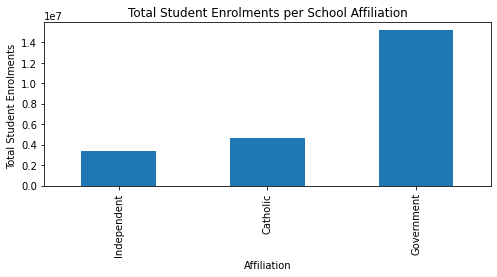

In [36]:
bar_plot = w.plot (kind = "bar", figsize=(8,3))
plt.title('Total Student Enrolments per School Affiliation')
plt.xlabel('Affiliation')
plt.ylabel('Total Student Enrolments ')
plt.show()

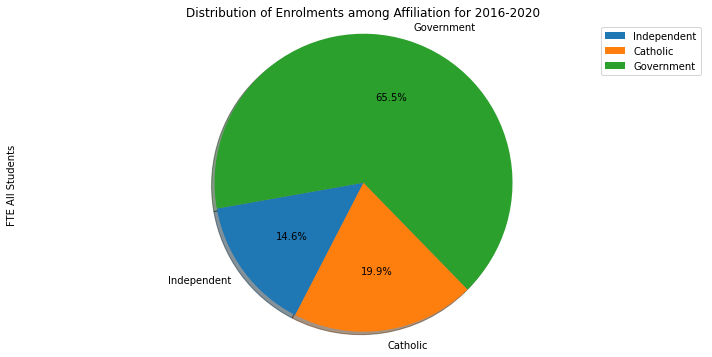

In [37]:
# Creating a pie plot
w.plot(kind="pie",y=['Affiliation (Gov/Cath/Ind)'],autopct="%1.1f%%",startangle=190,shadow=True,figsize=(10, 5))

plt.title("Distribution of Enrolments among Affiliation for 2016-2020")
plt.axis("equal")
plt.tight_layout()
plt.legend()

In [38]:
Group_by_last_five_years = Last_five_years_data_df.groupby(['State/Territory'])
Group_by_last_five_years.count().head(10)
x = Group_by_last_five_years['FTE All Students '].sum()
u = x.reset_index()
u

,State/Territory,FTE All Students
0,ACT,420358.3
1,NSW,7275850.7
2,NT,244955.8
3,Qld,4902578.3
4,SA,1606423.5
5,Tas.,486339.9
6,Vic.,5766582.1
7,WA,2496570.4


In [39]:
#def print_percentages(u):
    #enrolment = float(u[2])
   # Sum_of_all_enrolments = enrolment.sum()
    #percent = (enrolment / Sum_of_all_enrolments) * 100
#print(percent)

In [40]:
Sum_of_all_enrolments = u["FTE All Students "].sum()
percent = u["FTE All Students "]/Sum_of_all_enrolments*100   
percent
u["Percent growth in last six years"] = percent
u

,State/Territory,FTE All Students,Percent growth in last six years
0,ACT,420358.3,1.811916
1,NSW,7275850.7,31.361886
2,NT,244955.8,1.055859
3,Qld,4902578.3,21.132114
4,SA,1606423.5,6.924341
5,Tas.,486339.9,2.096323
6,Vic.,5766582.1,24.856323
7,WA,2496570.4,10.761237


In [41]:
Group_by_last_five_years = Last_five_years_data_df.groupby(['State/Territory'])
a = Group_by_last_five_years['FTE Aboriginal and Torres Strait Islander Students '].sum()
b = a.reset_index(["State/Territory"])
b
percentage = round(b['FTE Aboriginal and Torres Strait Islander Students ']/Sum_of_all_enrolments*100,2)
percentage
b["Percentage of indigeneous enrolment"] = percentage
b

,State/Territory,FTE Aboriginal and Torres Strait Islander Students,Percentage of indigeneous enrolment
0,ACT,12557.1,0.05
1,NSW,431246.9,1.86
2,NT,97005.0,0.42
3,Qld,394598.6,1.70
4,SA,75828.7,0.33
5,Tas.,43182.6,0.19
6,Vic.,95200.1,0.41
7,WA,162815.7,0.70


In [49]:
b.plot(kind="pie",y="State/Territory",autopct="%1.1f%%",startangle=190,shadow=True,figsize=(10, 5))
plt.title("Percentage of indegeneous enrolment for 2016-2020")
plt.axis("equal")
plt.tight_layout()
plt.legend()


TypeError: '<' not supported between instances of 'str' and 'int'

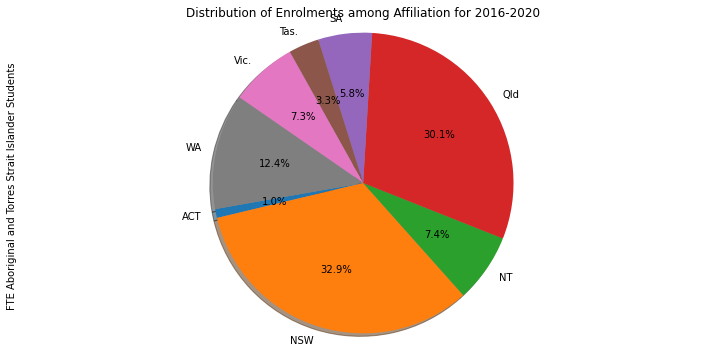

In [50]:
a.plot(kind="pie",y="State/Territory",autopct="%1.1f%%",startangle=190,shadow=True,figsize=(10, 5))
plt.title("Distribution of Enrolments among Affiliation for 2016-2020")
plt.axis("equal")
plt.tight_layout()
plt.show()

In [51]:
Group_by_last_five_years = Last_five_years_data_df.groupby(['State/Territory'])
c = Group_by_last_five_years['FTE Non-Indigenous Students '].sum()
d = c.reset_index()
d
percentage = round(d['FTE Non-Indigenous Students ']/Sum_of_all_enrolments*100,2)
percentage
d["Percentage of non-indigeneous enrolment"] = percentage
d

,State/Territory,FTE Non-Indigenous Students,Percentage of non-indigeneous enrolment
0,ACT,407801.2,1.76
1,NSW,6844603.8,29.50
2,NT,147950.7,0.64
3,Qld,4507979.7,19.43
4,SA,1530594.9,6.60
5,Tas.,443157.3,1.91
6,Vic.,5671382.0,24.45
7,WA,2333754.7,10.06


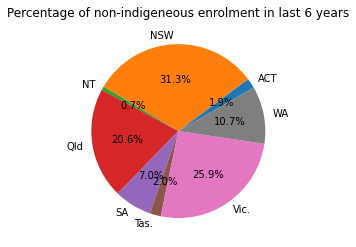

<Figure size 576x288 with 0 Axes>

In [52]:
data2 = d["Percentage of non-indigeneous enrolment"]
labels = d["State/Territory"]
explode = (0, 0.1, 0, 0.1, 0, 0, 0.1, 0)
pie_plot = data2.plot.pie(autopct="%1.1f%%", startangle=30, labels = labels, title='Percentage of non-indigeneous enrolment in last 6 years')
pie_plot.set_ylabel('')
fig = plt.figure(figsize=(8,4))

In [78]:
summary_df = pd.DataFrame({"State/Territory":labels, "Percentage of non-indigeneous enrolment": data2, "Percentage of indigeneous enrolment": data1})
summary_df
v = summary_df.set_index("State/Territory")
v



NameError: name 'data1' is not defined

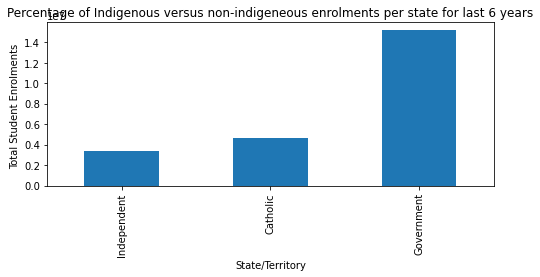

In [54]:
bar_plot = w.plot (kind = "bar", figsize=(8,3))
plt.title('Percentage of Indigenous versus non-indigeneous enrolments per state for last 6 years')
plt.xlabel('State/Territory')
plt.ylabel('Total Student Enrolments ')
plt.show()

In [ ]:
# Creating a pie plot 



In [76]:
# Create a pie chart
data = w["Percent growth in last six years"]
labels = u["State/Territory"]
explode = (0, 0.1, 0, 0.1, 0, 0, 0.1, 0)
pie_plot = data.plot.pie(autopct="%1.1f%%", startangle=30, labels = labels, title='Growth Percentage in last six years')
pie_plot.set_ylabel('')
fig = plt.figure(figsize=(8,4))


KeyError: 'Percent growth in last six years'

In [56]:
#Sum_of_all_enrolments = u["FTE All Students "].sum()
#percent = x["FTE All Students "]/Sum_of_all_enrolments*100   
#percent


In [57]:
print(Sum_of_all_enrolments)
for students in u:
    u["FTE All Students "] = (u["FTE All Students "]/Sum_of_all_enrolments)*100
u

23199658.999999993


,State/Territory,FTE All Students
0,ACT,0.000008
1,NSW,0.000135
2,NT,0.000005
3,Qld,0.000091
4,SA,0.000030
5,Tas.,0.000009
6,Vic.,0.000107
7,WA,0.000046


In [58]:
Group_by_last_five_years = Last_five_years_data_df.groupby(['State/Territory'])
Group_by_last_five_years.count().head(10)
x = Group_by_last_five_years['FTE All Students '].sum()
x.reset_index()
h = x.sort_values()



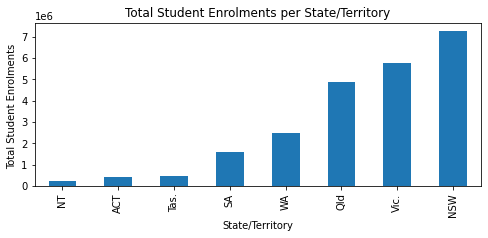

In [59]:
bar_plot = h.plot (kind = "bar", figsize=(8,3))
plt.title('Total Student Enrolments per State/Territory')
plt.xlabel('State/Territory')
plt.ylabel('Total Student Enrolments ')
plt.show()


In [ ]:
#Twenty_fifteen_data = data_file1_df[data_file1_df["Year"] == 2015]
#Twenty_fifteen_data.groupby(['State/Territory'])

  

In [60]:
Twenty_sixteen_df = data_file1_df[data_file1_df["Year"] == 2018]
Twenty_sixteen_df.dropna(how="any")
Group_by_state_twenty_sixteen = Twenty_sixteen_df.groupby(["State/Territory"])
z = Group_by_state_twenty_sixteen["FTE All Students "].sum()
z.reset_index()
g = z.sort_values()

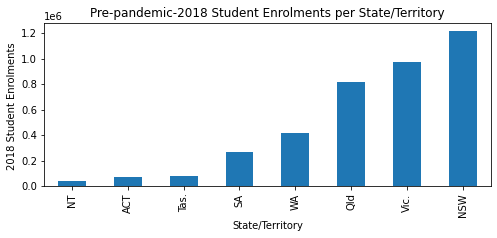

In [61]:
bar_plot = g.plot (kind = "bar", figsize=(8,3))
plt.title('Pre-pandemic-2018 Student Enrolments per State/Territory')
plt.xlabel('State/Territory')
plt.ylabel('2018 Student Enrolments ')
plt.show()

In [62]:
NSW_df = data_file1_df[data_file1_df["State/Territory"] == 'NSW']
group_by_year_for_NSW = NSW_df.groupby(["Year"])
l = group_by_year_for_NSW["FTE All Students "].sum()
l
k = l.reset_index()
k

,Year,FTE All Students
0,2006,1110315.6
1,2007,1110457.6
2,2008,1109949.5
3,2009,1112168.8
4,2010,1120429.7
5,2011,1129749.2
6,2012,1138990.3
7,2013,1154159.0
8,2014,1168320.8
9,2015,1181605.3


<AxesSubplot:xlabel='Year'>

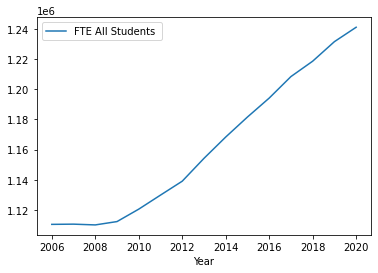

In [63]:
#Line plot
line_plot = k.plot.line(x = "Year" , y = "FTE All Students ") 
line_plot


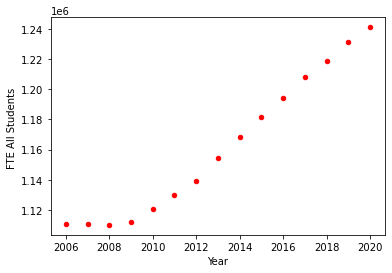

In [64]:
#scatter plot for NSW state
k.plot(kind = 'scatter', x='Year',y='FTE All Students ', color = 'red')
plt.show()

In [65]:
NT_df = data_file1_df[data_file1_df["State/Territory"] == 'NT']
group_by_year_for_NT = NT_df.groupby(["Year"])
j = group_by_year_for_NT["FTE All Students "].sum()
j
o = j.reset_index()
o

,Year,FTE All Students
0,2006,38057.9
1,2007,38609.6
2,2008,39217.0
3,2009,38632.8
4,2010,39352.4
5,2011,39417.8
6,2012,39962.9
7,2013,40485.5
8,2014,40749.2
9,2015,40552.8


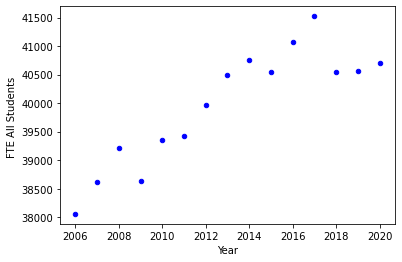

In [66]:
#scatter plot NT
o.plot(kind = 'scatter', x='Year',y='FTE All Students ', color = 'blue')
plt.show()

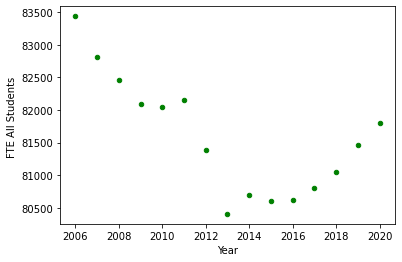

In [67]:
Tas_df = data_file1_df[data_file1_df["State/Territory"] == 'Tas.']
group_by_year_for_Tas = Tas_df.groupby(["Year"])
p = group_by_year_for_Tas["FTE All Students "].sum()
p
q = p.reset_index()
q
z = q.plot(kind = 'scatter', x='Year',y='FTE All Students ', color = 'green')
plt.show()
#plt.savefig('Tasmania trend for student enrolments.png')

In [68]:
Twenty_twenty_df = data_file1_df[data_file1_df["Year"] == 2020]
Twenty_twenty_df.dropna(how="any")
Group_by_state_twenty_twenty = Twenty_twenty_df.groupby(["State/Territory"])
i = Group_by_state_twenty_twenty["FTE All Students "].sum()
i.reset_index()
j = i.sort_values()

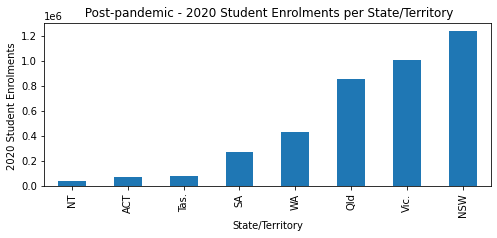

In [69]:
bar_plot = j.plot (kind = "bar", figsize=(8,3))
plt.title(' Post-pandemic - 2020 Student Enrolments per State/Territory')
plt.xlabel('State/Territory')
plt.ylabel('2020 Student Enrolments ')
plt.show()

In [70]:
#Group_by_state_twenty_fifteen = Twenty_fifteen_df.groupby(['State/Territory'])
#z = Group_by_state_twenty_fifteen['FTE All Students '].sum()


In [71]:
#z = Group_by_state_twenty_fifteen['FTE All Students '].sum()

In [72]:
#Student_enrolments = Group_by_last_five_years["FTE All Students "].sum()
#plt.bar(Student_enrolments["State/Territory", "FTE All Students "])
#plt.title('Total Student Enrolments per State/Territory')
#plt.xlabel('State/Territory')
#plt.ylabel('FTE All Students ')
#plt.show()

In [73]:
# Create a bar graph
#import matplotlib.pyplot as plt
Student_enrolments = pd.DataFrame({State/Territory: })
plt.bar("State/Territory", "FTE All Students ")
plt.title('Total Student Enrolments per State/Territory')
plt.xlabel('State/Territory')
plt.ylabel('FTE All Students ')
plt.show()
--
   
Data = {'Country': ['USA','Canada','Germany','UK','France'],
        'GDP_Per_Capita': [45000,42000,52000,49000,47000]
       }
df = pd.DataFrame(Data,columns=['Country','GDP_Per_Capita'])

New_Colors = ['green','blue','purple','brown','teal']
plt.bar(df['Country'], df['GDP_Per_Capita'], color=New_Colors)
plt.title('Country Vs GDP Per Capita', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.ylabel('GDP Per Capita', fontsize=14)
plt.grid(True)
plt.show()


SyntaxError: invalid syntax (<ipython-input-73-237d761443f4>, line 3)

In [74]:
# def remove_prefix(str, prefix):
    if str.startswith(a):
        return str[len(prefix):]
    return str
for x in data_file1_df.columns:
    x.remove_prefix()

IndentationError: unexpected indent (<ipython-input-74-7b822dfb0005>, line 2)

In [75]:
fish = "Peace"
letters = []
for letter in fish:
    letters.append(letter)
    print(letters)

['P']
['P', 'e']
['P', 'e', 'a']
['P', 'e', 'a', 'c']
['P', 'e', 'a', 'c', 'e']
